In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [61]:
tol = 1e-6
col = ['r', 'b', 'g', 'c', 'm', 'k'] 
A = 1
L = 4
xshoot = np.linspace(-L, L, 81)

In [62]:
def shoot2(y, x, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

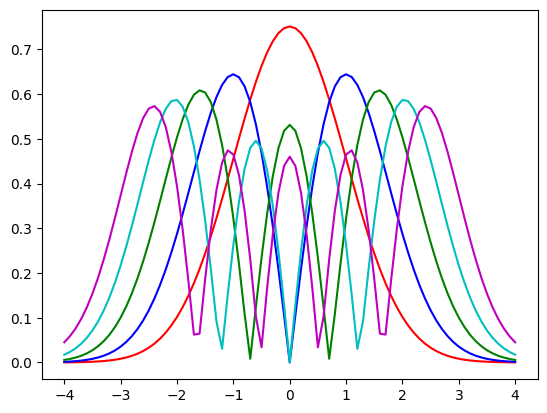

In [63]:
epsilon_list = [0.1]
epsilon_start = epsilon_list[0]
eigenfunction_list = []
for modes in range(1, 6): 
    epsilon = epsilon_start 
    depsilon = 0.2
    for _ in range(1000): 
        y0 = [A, np.sqrt(L**2 - epsilon)]
        y = odeint(shoot2, y0, xshoot, args=(epsilon,))
        if abs(y[-1, 1] +  np.sqrt(L**2 - epsilon) * y[-1, 0]) < tol:
            epsilon_list.append(epsilon) 
            break 
        if (-1) ** (modes + 1) * (y[-1, 1] +  np.sqrt(L**2 - epsilon) * y[-1, 0]) > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2

    epsilon_start = epsilon + 0.1 

    norm = np.trapezoid((y[:, 0]) * (y[:, 0]), xshoot)
    eigenfunction_list.append(abs(y[:, 0]) / np.sqrt(norm))
    
    plt.plot(xshoot, eigenfunction_list[modes - 1], col[modes - 1])
eigenfunction_matrix = np.column_stack(eigenfunction_list)

In [64]:
A1 = eigenfunction_matrix
A2 = epsilon_list[-5:]

print(A1)
print(A2)

[[2.56183470e-04 1.45461736e-03 5.66711043e-03 1.74588473e-02
  4.50516581e-02]
 [3.76940965e-04 2.08377489e-03 7.88695716e-03 2.35399838e-02
  5.86293690e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583001e-02
  7.58483958e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281002e-02
  9.71899061e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048286e-02
  1.23080898e-01]
 [1.64382706e-03 8.13893182e-03 2.73391696e-02 7.15653847e-02
  1.53831231e-01]
 [2.32055909e-03 1.11600069e-02 3.63163648e-02 9.17795041e-02
  1.89559851e-01]
 [3.24364379e-03 1.51394491e-02 4.76780810e-02 1.16171080e-01
  2.30113234e-01]
 [4.48904553e-03 2.03165046e-02 6.18486348e-02 1.45069151e-01
  2.74981544e-01]
 [6.15097107e-03 2.69674234e-02 7.92584568e-02 1.78649425e-01
  3.23220532e-01]
 [8.34442598e-03 3.54034079e-02 1.00317630e-01 2.16868657e-01
  3.73389569e-01]
 [1.12075190e-02 4.59653552e-02 1.25381539e-01 2.59395932e-01
  4.23517965e-01]
 [1.49032591e-02 5.90146385e-02 1.547089

(81, 5)
Eigenvectors:
[[-2.66039936e-02+0.j  1.01209412e-02+0.j  3.24377024e-03+0.j
  -8.27397461e-04+0.j  1.45457562e-04+0.j]
 [-2.91941280e-02+0.j  1.13988373e-02+0.j  3.74780567e-03+0.j
  -9.80116840e-04+0.j  1.76557880e-04+0.j]
 [-3.34596135e-02+0.j  1.35505195e-02+0.j  4.61189698e-03+0.j
  -1.24607174e-03+0.j  2.31497189e-04+0.j]
 [-3.94000069e-02+0.j  1.66416150e-02+0.j  5.88525792e-03+0.j
  -1.64685621e-03+0.j  3.15996805e-04+0.j]
 [-4.70314090e-02+0.j  2.07676216e-02+0.j  7.63887673e-03+0.j
  -2.21408037e-03+0.j  4.38590864e-04+0.j]
 [-5.63545661e-02+0.j  2.60408294e-02+0.j  9.96277813e-03+0.j
  -2.98968680e-03+0.j  6.11011042e-04+0.j]
 [-6.73240016e-02+0.j  3.25765490e-02+0.j  1.29631264e-02+0.j
  -4.02646918e-03+0.j  8.48715993e-04+0.j]
 [-7.98180125e-02+0.j  4.04776980e-02+0.j  1.67585017e-02+0.j
  -5.38855584e-03+0.j  1.17152985e-03+0.j]
 [-9.36105181e-02+0.j  4.98173165e-02+0.j  2.14748026e-02+0.j
  -7.15162808e-03+0.j  1.60435323e-03+0.j]
 [-1.08346748e-01+0.j  6.06191002